### 데이터셋 다운로드
- https://github.com/bab2min/corpus.git

### 데이터 선택
- 네이버 쇼핑 리뷰 말뭉치
    - 라벨링 : 5,4(긍정) / 1,2(부정) -> 별도의 라벨링 작업 필요
- 스팀 리뷰 말뭉치
    - 라벨링 : 1(긍정) / 0(부정)

### 데이터 로딩
- \t으로 데이터를 구분한 데이터셋(tsv 형식)
- 컬럼데이터가 없기 때문에 read_csv에서 header=None으로 읽기

### 단어빈도분석 / 단어유사도분석 / 감성분석

#### steam 긍정리뷰 wordcount

In [36]:
#### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
from tqdm import tqdm

In [4]:
steam_reviews = pd.read_csv("./data/steam.txt", delimiter="\t",
                           header=None)
steam_reviews.columns = ["label","review"]

In [5]:
steam_reviews_pos = steam_reviews[steam_reviews['label'] == 1]
steam_reviews_neg = steam_reviews[steam_reviews['label'] == 0]

In [8]:
okt = Okt()

In [12]:
steam_pos_tokens = [ t for doc in tqdm(steam_reviews_pos['review']) for t in okt.nouns(doc)]

100%|██████████| 49996/49996 [05:57<00:00, 139.86it/s]


In [34]:
wc = WordCloud(background_color="white", 
               font_path="C:\Windows\Fonts\malgunsl.ttf")
cloud_rs = wc.generate_from_text(" ".join(steam_pos_tokens))

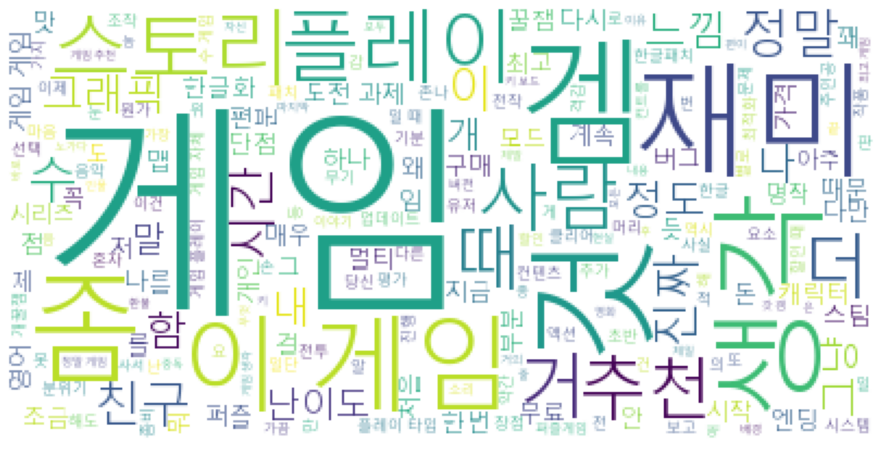

In [35]:
plt.figure(figsize=(20,8))
plt.imshow(cloud_rs)
plt.axis("off") # x축,y축 끄기
plt.show()

#### steam 리뷰 단어 유사도

In [37]:
from gensim.models import Word2Vec

In [38]:
# 형태소 단위로 추출
steam_morphs = [okt.morphs(doc) for doc in tqdm(steam_reviews['review'])]

100%|██████████| 100000/100000 [15:52<00:00, 105.01it/s]


In [75]:
w2c = Word2Vec(window=5, 
               min_count=5,
               sg=1, 
               vector_size=100,
               sentences=steam_morphs)

In [78]:
w2c.wv.most_similar("게임")

[('겜', 0.7413129210472107),
 ('플랫폼', 0.7169410586357117),
 ('발상', 0.7040039300918579),
 ('카드게임', 0.7030012011528015),
 ('껨', 0.6955452561378479),
 ('격투게임', 0.6954630613327026),
 ('레이싱게임', 0.6937574744224548),
 ('지금껏', 0.6874290704727173),
 ('프로그램', 0.6860631704330444),
 ('부류', 0.6850497126579285)]

In [79]:
w2c.wv.most_similar("격투")

[('TPS', 0.8221147060394287),
 ('쯔꾸르', 0.8180680274963379),
 ('즐겨하는', 0.8071260452270508),
 ('탄막슈팅', 0.8043613433837891),
 ('탑뷰', 0.803598165512085),
 ('암살게임', 0.7987951040267944),
 ('많았던', 0.7971831560134888),
 ('스포츠', 0.7907202839851379),
 ('뛰어납니다', 0.7863515019416809),
 ('DC', 0.7819181680679321)]

In [80]:
w2c.wv.most_similar("렉")

[('랙', 0.8505979180335999),
 ('드랍', 0.764708399772644),
 ('프레임', 0.7381590008735657),
 ('핑', 0.7278514504432678),
 ('끊김', 0.726481020450592),
 ('프리징', 0.712731122970581),
 ('잔렉', 0.6885432004928589),
 ('걸려요', 0.6819656491279602),
 ('버벅', 0.6632012128829956),
 ('걸리고', 0.6628187298774719)]

In [82]:
w2c.wv.most_similar("점수")

[('스코어', 0.7170358896255493),
 ('1/10', 0.6835194826126099),
 ('메타', 0.6601077318191528),
 ('6/10', 0.6594692468643188),
 ('8/10', 0.6561101078987122),
 ('평점', 0.6542407274246216),
 ('메타크리틱', 0.6507418155670166),
 ('4/10', 0.6326566934585571),
 ('주고싶네요', 0.6254751086235046),
 ('주고싶다', 0.6099997758865356)]

In [83]:
w2c.wv.most_similar("랭킹")

[('메이킹', 0.7942624688148499),
 ('랭크', 0.7854244709014893),
 ('부제', 0.7825637459754944),
 ('뱀파이어', 0.7765179872512817),
 ('계급', 0.7750900983810425),
 ('pve', 0.7744550108909607),
 ('등급', 0.7713277339935303),
 ('시너지', 0.7692235112190247),
 ('반칙', 0.7645581960678101),
 ('PVE', 0.762976884841919)]

#### 네이버 쇼핑 긍정/부정 감성분석

In [47]:
naver_shop = pd.read_csv("./data/naver_shopping.txt", delimiter="\t",
                        header=None)
naver_shop.columns = ["score","review"]

In [48]:
naver_shop.head()

,score,review
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [49]:
# 긍정,부정 라벨링
def labeling(row):
    if row['score'] >= 4 :
        return 1
    else :
        return 0

In [50]:
naver_shop['label'] = naver_shop.apply(labeling, axis=1)

In [54]:
# 한글제외 삭제(정규표현식)
naver_shop['review'] = naver_shop['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\user\AppData\Local\Temp\ipykernel_17656\3693972463.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  naver_shop['review'] = naver_shop['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [55]:
naver_shop.head()

,score,review,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...,0
4,5,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [56]:
# 훈련,평가 데이터 분리
from sklearn.model_selection import train_test_split

In [57]:
text_train,text_test,y_train,y_test = train_test_split(naver_shop['review'],
                                                      naver_shop['label'],
                                                      random_state=804)

In [58]:
text_train.shape, y_train.shape

((150000,), (150000,))

In [59]:
text_test.shape, y_test.shape

((50000,), (50000,))

In [60]:
# 텍스트 데이터 정형화
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
def myTokenizer(text):
    rs = okt.pos(text) # 품사부착
    df = pd.DataFrame(rs, columns=["형태소","품사"])
    # 불리언색인
    df2 = df[(df['품사']=='Noun') | (df['품사']=='Adjective')]
    return df2['형태소']

In [97]:
# 파이프라인 구축
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [122]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=myTokenizer, max_features=10000)),
    ('logi',LogisticRegression())
])

In [123]:
# 교차검증
from sklearn.model_selection import GridSearchCV

In [124]:
grid_param = {
    "tfidf__max_df" : [7000,8500,10000],
    "tfidf__min_df" : [1, 5, 8, 10],
    "tfidf__ngram_range" : [(1,2),(2,2),(1,3)],
    "logi__C" : [0.001, 0.01, 0.1, 10, 100, 1000]
}

In [ ]:
grid = GridSearchCV(pipe, grid_param, cv=3)
grid.fit(text_train,y_train)

In [ ]:
# 결과확인
print("최고점수 : ",grid.best_score_)
print("최고조합 : ",grid.best_params_)
# 최적의 파라미터로 학습된 모델
best_model = grid.best_estimator_
# 단어사전 수
print(len(best_model.steps[0][1].vocabulary_))

In [ ]:
# 분석단어 가중치 확인하기
naver_coef = best_model.steps[1][1].coef_[0]
naver_vocab = best_model.steps[0][1].vocabulary_

df = pd.DataFrame([naver_vocab.keys(), naver_vocab.values()],
                 index=["단어","인덱스"]).T.sort_values(by="인덱스").set_index("인덱스")
# vocab과 가중치 결합
df['가중치'] = naver_coef

In [ ]:
# 가중치를 중심으로 정렬 -> 상위 30, 하위 30개 단어 추출
df.sort_values(by="가중치", inplace=True, ascending=False)
top30 = df.head(30)
bottom30 = df.tail(30)

In [ ]:
# 한글로 출력하기 위해서 폰트 지정하기!
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

# 마이너스 나오게하기
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 시각화
main_words = pd.concat([top30,bottom30])
main_words.set_index("단어").plot(kind='bar',
                                 figsize=(20,5),
                                 rot=70)